# League of Legends EDA (Exploratory Data Analysis)
### *' One of the world's most popular video games '*

                                                            'The New York Times'

#### By Mario Chacon Ruiz
##### Sevilla, Mayo de 2022.
----------
------- 

El objetivo de este EDA es determinar cuáles son los elementos clave para conseguir victorias. 

Con este análisis, queremos ayudar a entender algunas de las muchísimas variables que existen y forman parte del juego para simplificarlo y obtener mejores resultados una vez hemos visto en profundidad los entresijos se sus componentes.

Primeramente, para crear un poco de contexto, nos dispondremos a explicar muy brevemente como funciona **League of Legends**:

Se trata de un juego multijugador en línea (MOBA), en el que 2 equipos (equipo azul y equipo rojo), formados por 5 jugadores cada uno (5 vs 5), intentan destruir el nexo del oponente. Cada equipo aparece al principio de la partida en su nexo, y también después de cada muerte. Para destruir el nexo enemigo, deben destruir las torretas e inhibidores que lo defienden y se interponen en las calles. 

Cada equipo genera automáticamente *minions* desde su nexo, los cuales son automatizados y avanzarán por cada una de las 3 líneas del mapa, atacando siempre al enemigo. Los jugadores normalmente se dividen en las 3 líneas para ganar oro, experiencia (exp) y así comprar items. Deben ganar oro y exp que se generan a través de derrotar *minions*, obtener *kills*(muertes) y destruir torretas. Los ítems generan estadísticas como daño mágico (*ap*), daño físico (*ad*), absorber daño (*resistencia mágia (mr)* o *armadura*), vida(*hp*) regeneración de vida, etc. Como véis, hay muchísimas variantes e infinidad de combinaciones, ya que además cada jugador podrá elegir un campeón entre los más de 150 que componen actualmente el juego (cada uno con diferentes hechizos y ataques), formando así composiciones en el equipo, la cual permite diferentes estrategias para conseguir la victoria.

Una vez realizada esta breve introducción, sumerjámonos en el EDA...

![Mapa](../img/grieta-invocador.jpg)

Contenido del EDA:
1. Importaciones de librerías
2. Datos contenidos en los 10 primeros minutos de partida.
3. Datos de partidas completas.
4. Conclusiones.
5. URLs consultadas. 

## 1- Importaciones:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2- Datos de los primeros 10 minutos de partida: ```data_lol```

In [2]:
#Cargamos el dataset:
data_lol = pd.read_csv('./Bases de datos/howtowin_10min.csv')
data_lol.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


Esta es la tabla de datos que contiene muchísima información perteneciente a la visión, a muertes, a asistencias, a monstruos, a dragones, heraldos, a oro, a minions y a experiencia. Tanto del equipo rojo como del equipo azul. Vamos a filtrar un poco la tabla para limpiarla y quedarnos con datos que nos interesen realmente, desechando trazas de información que no nos interesa, como puede ser la columna gameId, la cual no nos aporta nada.

In [3]:
#Quitemos la columna 'gameID' ya que no nos aporta nada:
data_lol.drop('gameId', axis=1, inplace=True)

#Clarificamos la columna 'blueWins' con victoria y derrota en vez de 1s y 0s:
data_lol['blueWins'].astype(str).replace('1', 'Win').replace('0','Lose')

0       Lose
1       Lose
2       Lose
3       Lose
4       Lose
        ... 
9874     Win
9875     Win
9876    Lose
9877    Lose
9878     Win
Name: blueWins, Length: 9879, dtype: object

In [4]:
# Mostramos el tamaño y la cantidad de elementos con que cuenta el dataset principal:
print(data_lol.size)
data_lol.shape

385281


(9879, 39)

In [5]:
# Tiene algunos valores nulos?
data_lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

Genial, no contamos con datos nulos que influyan en los resultados. 

In [6]:
# Veamos los nombres de las columnas en su totalidad.
data_lol.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

Como podemos apreciar, las columnas muestran diferentes datos entre el equipo azul y el equipo rojo. Gracias a dicho contenido desarrollaremos comparativas para analizar su correlación con la victoria. 

In [7]:
# Esta es una pequeña muestra de nuestra base de datos:
data_lol.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


Ya hemos entendido los datos con los que vamos a trabajar y los hemos despejado a nuestro interés. 

Como vamos a utilizar gráficas, tengamos preparado el módulo ```seaborn``` para nuestras visualizaciones.

In [9]:
sns.set()

#### EQUIPOS

Con esta muestra de datos en los que se recogen todos los factores que han influido en los primeros 10 minutos de partida, seremos capaces de analizar los eventos que han ocurrido en ese margen de tiempo e identificar variables que estén correlacionadas con la victoria, en  mayor in menor medida, para así encontrar respuestas a la pregunta principal lanzada al principio de este análisis. En definitiva, intentaremos descifrar cuál o cuáles de ellas merece especial atención para tener más influencia en la victoria. 

En primer lugar, ¿influye en algo el equipo que te toque? Veamos si algún equipo tiene más victorias que el otro.

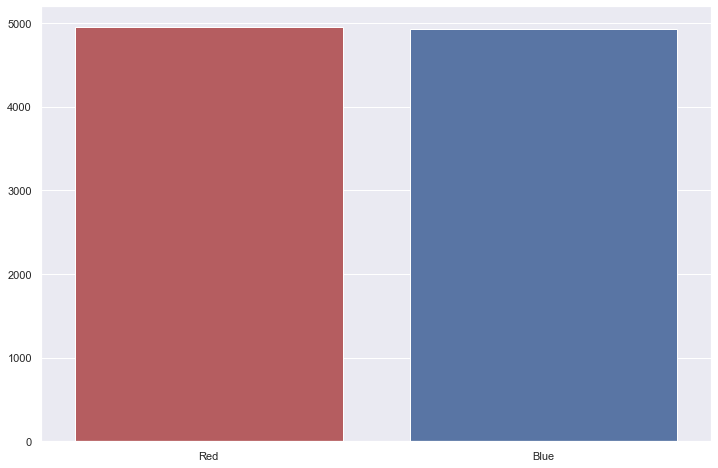

In [10]:
# Gráfica de porcentaje de victorias equipos rojo y azul:
plt.figure(figsize=(12,8))
sns.countplot(x=data_lol['blueWins'], palette=sns.color_palette(['r','b']))
plt.xticks([0,1], ['Red', 'Blue'])
plt.xlabel('')
plt.ylabel('');

Ya vemos que hay casi un 50% de victorias en cada equipo, el rojo y el azul, lo que significa que no hay ningún tipo de sesgo a la hora de caer en algún equipo en concreto. Este proceso de cuál equipo es el tuyo, es un proceso que se hace de manera completamente aleatoria en el lobby de League of Legends. 
El equipo azul ocupará la posición izquierda del mapa, mejor dicho, la inferior izquierda. El equipo rojo ocupará la posición superior derecha. Ambos lados son completamente simétricos, y ya vemos que hay igual probabilidad de ganar independientemente de qué zona del mapa se ocupe.

Al fijarnos en la figura anterior, vemos que dentro de la muestra de casi 10.000 partidas analizadas, tenemos una cifra muy ajustada de número de victorias por cada equipo. Analicemos cuáles fueron los factores determinantes de los primeros 10 minutos de partida para conseguirlas.

Clarifiquemos los datos, siguiendo la tendencia, vamos a centrarnos en los parámetros del equipo azul, ya que el porcentaje de victorias es equivalente, es más cómodo trabajar con los datos de un solo equipo, en este caso el azul, para las gráficas que vamos a generar a continuación. 

Inferiremos que las victorias del equipo rojo son las derrotas del equipo azul según los datos de nuestro Dataframe.

In [11]:
# Despejamos el equipo rojo:
data_lol_blue = data_lol.copy() 
data_lol_blue = data_lol_blue.loc[:,~data_lol_blue.columns.str.startswith('red')]

#### CORRELACIÓN

Vamos a observar la correlación de las diferentes variables en las victorias:

<Figure size 2160x720 with 0 Axes>

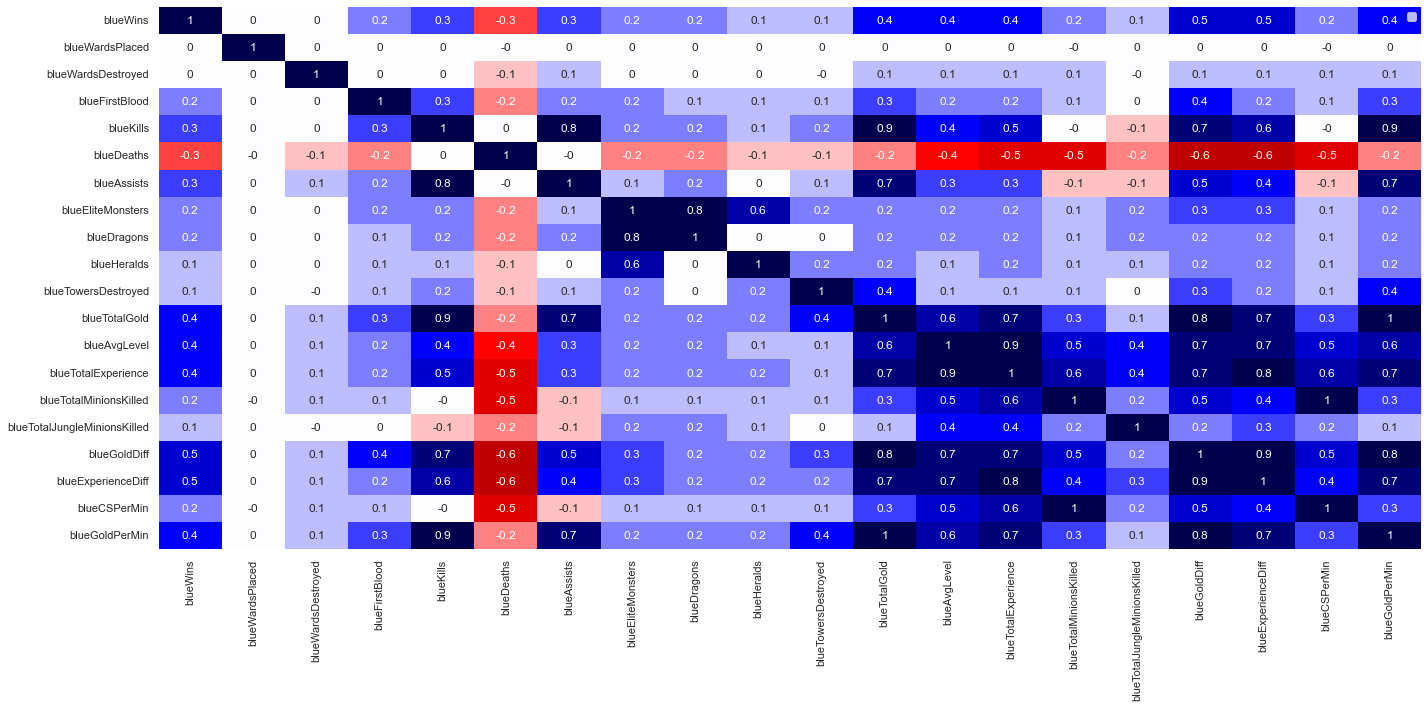

In [14]:
# Correlación de los datos con la victoria:
plt.figure(figsize=(30,10))
corrmat = data_lol_blue.corr()
# corrmat = np.tril(corrmat)
corrmat[corrmat==0] = None
corrmat = corrmat.round(1)
labels = data_lol_blue.select_dtypes(include='number').columns.values
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, annot=True, vmax=0.8,vmin=-0.8, cmap='seismic_r', xticklabels=labels,yticklabels=labels, cbar=False)
plt.legend('')
plt.tight_layout()
plt.show();

Al ser datos que proceden de partidas hasta el minuto 10 de partida, significa que no todos los elementos se van a mostrar. Por ejemplo, en League of Legends aparece el Baron Nashor, un monstruo neutral que provoca mayor poder en los minions, haciendo que éstos cuenten con más daño y poder destructivo, a partir del minuto 20. Este factor, al aparecer después del límite de esta primera base de datos, no entrará en cuenta, pero, por experiencia personal, sabemos que sí tiene. De momento, centrémonos en los detalles que salen a la luz con esta tabla de correlación.

En la tabla de correlación se observan varios detalles muy interesantes. Por ejemplo, a simple vista, la experiencia del equipo azul está fuertemente ligada a los niveles de los campeones, lo cual es muy lógico, ya que sin puntos de experiencia no se subirá de nivel. De la misma manera que a más oro generado, más muertes se han conseguido. El nivel de experiencia que se tenga junto con el nivel de oro que se haya conseguido tiene gran peso en el factor de la victoria, ya que, pese a ser unos datos hasta el minuto 10, la diferencia de oro y nivel es tan significativa y marca tanto las partidas que una ventaja a ese minuto tiene importancia en la victoria final, la cual no se consigue hasta, normalmente, muy pasados esos 10 minutos, como ya veremos abajo en una media de duración de partidas.

La tabla de correlación también nos enseña medidas de visión. La visión (*wards*), que se han colocado y destruido al principio del juego, parece que no han tenido influencia en las victorias del equipo azul, al tener una relación de 0. Pero, ¿han tenido que ver en la cantidad de monstruos conseguidos, y muertes en la partida? Luego nos fijaremos de manera más centrada en la visión.

La tabla nos muestra cada una de las correlaciones por columna de nuestro Dataset. Vemos que, en la correlación con la victoria, las que más se acercan es el oro y la experiencia.

Bien, dentro de la correlación del oro, vemos que conseguir minions, muertes y torres están muy relacionados, al igual que con la experiencia. Esto parece indicar claramente que esas son las claves para conseguir diferencia de oro y experiencia.

En resumen, podemos ver muchas variables interrelacionadas en el anterior gráfico.

Vamos a ordenar las variables con mayor relación en el devenir de la partida de mayor a menor:

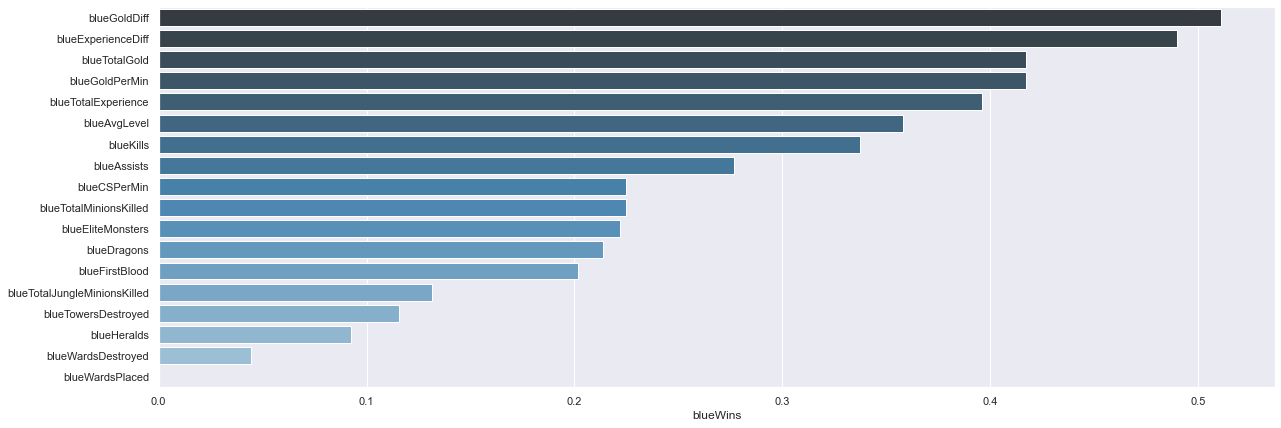

In [12]:
# Gráfica ranking de variables más correlacionadas con la victoria:
plt.figure(figsize=(20,7))
rank_corr = data_lol_blue.corr()['blueWins'].drop(['blueWins','blueDeaths'])
rank_corr = rank_corr.sort_values(ascending=False)

pal = sns.color_palette("Blues_d", len(rank_corr))
rank = rank_corr.argsort()

sns.barplot(y=rank_corr.index, x=rank_corr, palette=np.array(pal[::])[rank])

plt.show()

Vemos que las variables con mayor impacto en el resultado son las relacionadas con las diferencias de oro y experiencia, seguidas por las que generan ese oro y experiencia, como pueden ser las muertes conseguidas y los cs (minions) que se han conseguido derrotar, obteniendo oro y exp a cambio.

Como vimos antes, salen a la luz las variables más correlacionadas con la victoria en este ranking, la cual nos las muestra muy gráficamente.

#### PRIMERA SANGRE
¿Influyen las primeras sangres en la partida? Una muerte normal genera 300 de oro para el jugador que aniquila al otro. Una primera sangre, es la primera muerte que se consigue en la partida, y como bonificación, esta primera sangre genera 400 de oro, 100 más que una muerte normal. ¿No es mucho, verdad?

In [13]:
# Primera sangre e importancia en victoria:
data_lol['blueFirstBlood'].value_counts()

1    4987
0    4892
Name: blueFirstBlood, dtype: int64

Hay una ligera mayoría de primeras muertes en las victorias del equipo, un poco más que en las muertes. Parece que esos 100 de oro de diferencia no tienen gran importancia en el devenir de la partida. 

#### ORO

Pero, ¿de cuánta cantidad de oro estamos hablando?. Cierto, no tenemos referencias de cuánto oro se genera y qué se hace con él.
A modo muy breve, se empieza con 500 de oro, sólo un poco. Cada cs eliminado genera unos 18 de oro aproximadamente. Cada muerte sabemos que 300, destruir un ward (dependiendo del tipo), genera aproximadamente unos 30 de oro. Cada torreta, 350.

Bien, ahora que sabemos un poco más del oro. Éste se debe invertir en objetos, los cuales aportan estadísiticas a los campeones. Hay más de 175 ítems que pueden adquirirse, dependiendo de la finalidad de tu estilo de juego: armadura, daño, daño mágico, vida, etc... Cada campeón puede 'vestir' 6 ítems por partida, y ello cuesta dinero.

Por tanto, mientras antes consigas oro, antes acelerarás estadísticas para poder tener dominancia sobre tus adversarios, lo que te garantiza más probabilidad de vencer en la batalla.

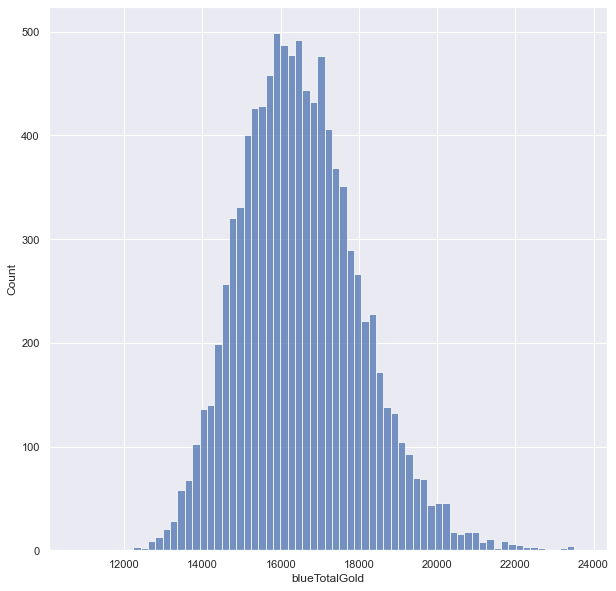

In [14]:
# Gráfica oro:
plt.figure(figsize=(10,10))
sns.histplot(data_lol['blueTotalGold']);

Vemos que la media de oro generado en los primeros 10 minutos se establece entre los 14 y 20000 de oro por equipo. Interesante. Si un ítem, más o menos, cuesta unos 2500-3000 de oro, podemos deducir que, aproximadamente, a minuto 10 de partida cada jugador contará con un ítem en su haber. 

#### MONSTRUOS NEUTRALES

Vamos a explorar los monstruos neutrales al principio de la partida. 

A modo explicatorio, los monstruos neutrales son objetivos que pueden derrotarse y que conceden beneficios al equipo que los destruye.
Hay 4 monstruos neutrales más 'importantes':
- Bufos azul y rojo: dan 100 de oro y son campamentos de la jungla. La jungla es la parte que no son las 3 calles que componen el mapa. El bufo azul regenera maná muy rápidamente, y el bufo rojo quema poco a poco a los objetivos que han recibido un ataque básico, regenerando vida más rapidamente que sin bufo rojo. Estas mejoras duran 2 minutos.
- Dragones: actualmente hay 5 distintos, y al haber destruido tu equipo 4, se obtiene el alma de dragón, la cual, es distinta, dependiendo de qué alma de dragón has conseguido. No dan tanto oro, sólo dan 25, pero lo importante es la estadística que genera, sobre todo al acumularse, ya que el alma infernal, por ejemplo, da mucho más daño de ataque/mágico, el alma de océano regenera vida y maná rápidamente en combate, el alma de roca da mucha resistencia a los campeones del equipo, así como otras estadísticas el alma de viento y la hextech.
- Heraldo: son objetivos neutrales que dan 25 de oro pero que se utilizan para, una vez obtenidos, se invoca una vez para provocar un gran golpe a una estructura, como puede ser una torreta o un inhibidor. Aparece en el minuto 8 y puede haber un segundo si el primero se derrota antes del minuto 14. A partir del minuto 20 de partida el heraldo se destruye automáticamente para dejar lugar al mayor monstruo del juego.
- Baron Nashor: gran monstruo neutral que genera 300 de oro a cada jugador del equipo y aumenta la resistencia y el daño de los minions del equipo que lo ha derrotado. Dura 3 minutos, y su principal valor reside en gestionarlo con los minions para destruir torretas, inhibidores y nexo rival.

<p float="left">
  <img src="../img/drake.jpg" width="600" />
  <img src="../img/baron-nashor.jpg" width="500" /> 
</p>

In [15]:
#Conteo monstruos neutrales:
data_lol.groupby('blueWins')['blueEliteMonsters', 'blueDragons','blueHeralds'].sum()

,blueEliteMonsters,blueDragons,blueHeralds
blueWins,,,
0,2036,1284,752
1,3397,2292,1105


Observamos que en el cómputo global de monstruos neutrales sí hay cierta diferencia entre los monstruos totales conseguidos en las victorias y los monstruos neutrales obtenidos en las derrotas. En esta base de datos, sólo aparecen, por el tiempo que tenemos de partidas, bufos azules y rojos, dragones y heraldos.

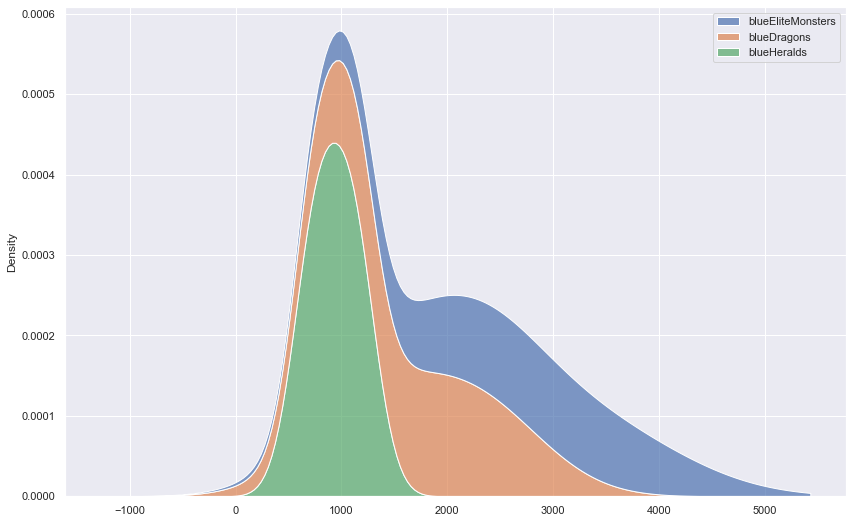

In [16]:
# Gráfica simple de monstruos a los 10 mins de partida:
monsters_lol = data_lol.groupby('blueWins')['blueEliteMonsters', 'blueDragons','blueHeralds'].sum()
plt.figure(figsize=(14,9))
sns.kdeplot(data=monsters_lol, multiple="stack", alpha=0.7);

¿Qué vemos en esta gráfica anterior? Bien, recordemos que vemos las estadísticas del equipo azul para simplificar datos, ya que vimos que ambos obtuvieron el 50% de victorias, lo que significa que aproximadamente sus valores en la victoria serán muy parecidos.

Vemos que los monstruos neutrales más conseguidos son los bufos tanto azul como rojo. Esto tiene lógica ya que son los que, una vez conseguidos, se regeneran  a los 5 minutos (lo que conocemos como respawn), y forman parte de los campamentos que el jugador que ocupe la posición de jungla va a eliminar con más frecuencia para aumentar de nivel y conseguir oro. Además los bufos, estos campamentos de la jungla, los hay 2 por cada lado, lo que indica que se obtengan más en cada partida.

A continuación, los dragones son los que se consiguen más. Aparecen en el minuto 5 y después otro a los 5 minutos, lo que indica que se puedan conseguir más que heraldos.

Por último, los heraldos (en verde), son los que menos se han obtenido ya que solo hay 1 en los 10 primeros minutos de partida (aparece al 8).


#### VISIÓN
Veamos un poco más la visión:

In [17]:
# Visión más de cerca:
vision = data_lol.groupby('blueWins')['blueWardsPlaced','blueWardsDestroyed'].sum()
vision

,blueWardsPlaced,blueWardsDestroyed
blueWins,,
0,110297,13505
1,109889,14402


Como vemos, apenas hay diferencia entre los puntos de visión y las victorias/derrotas (mucho menos que en la comparativa de monstruos neutrales, por ejemplo), explicando así su poca importancia reflejada en la gráfica antes.

<Figure size 1440x1080 with 0 Axes>

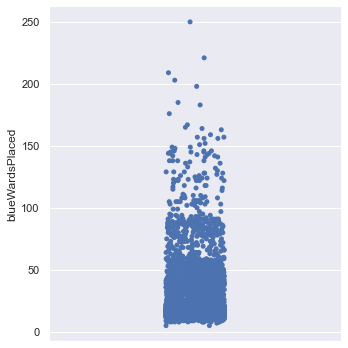

In [18]:
# Pequeña gráfica de guardianes de visión colocados:
plt.figure(figsize=(20,15))
sns.catplot(data=data_lol, y='blueWardsPlaced')
plt.show()

Vemos arriba que lo más común es poner menos de 100 'Wards' o guardianes de visión en los 10 minutos que analizamos por partida. Los guardianes de visión son pequeños puntos de visión que los jugadores colocan en el mapa, en una zona próxima a ellos, y duran 90 segundos, revelando la zona a oscuras y pudiendo observar si enemigos se encuentran en la zona o no. Esto permite predecir movimientos del equipo rival, rutas que toman en distintas partes del mapa, ya que, normalmente, no tenemos localizados a los 5 miembros del equipo oponente en todo momento. Para eso utilizamos la visión; a mejor visión, normalmente, mejor control sobre el adversario y menos sorpresas, lo que supone mayor control sobre la partida. 

Pero, ¿realmente tiene tan poco impacto en el resultado final tal y como nos explicaba la gráfica anterior? Echemos un vistazo si tiene factor importante en las muertes conseguidas.

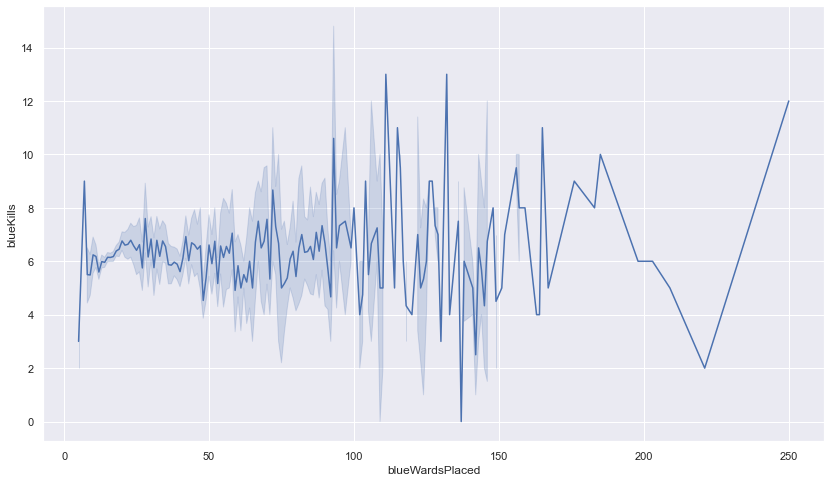

In [19]:
#Gráfica de visión en relación a las muertes conseguidas.
plt.figure(figsize=(14,8))
sns.lineplot(x=data_lol['blueWardsPlaced'], y=data_lol['blueKills']);

Parece que, tal y como indica la gráfica, los puntos donde se han conseguido más muertes del rival son cuando se han colocado entre 100 y 150 guardianes de visión, aunque, incluso habiendo puesto alrededor de 140 guardianes, hay picos en los que no se registran muertes. ¿A qué se debe esto?, bueno, puede ser que el equipo rival también tenga visión, lo que hace que, por mucha visión que tengas sobre el rival, si él también te está observando, no habrá oportunidad de sorpresas, ya que ambos equipos se tienen controlados. También puede ser una interpretación válida el hecho de que con sólo la visión, no consigues nada, debes de acompañarlo de movimientos astutos, no estar muy por detrás de nivel ni oro y teniendo en cuenta tanto los objetivos neutrales como las estructuras. Además, los puntos de visión ocupan una zona muy pequeña del mapa completo, pero el mapa es mucho más grande en comparación a esa zona, por lo que otra interpretación importante de no observar una tendencia lineal directa en la gráfica anterior es: no 'importa' el número de wards que se coloquen, sino la importancia de cada uno de esos wards, el momento en el que se coloque, el lugar, etc. 

Ya vemos, League of Legends no es un juego demasiado simple...

## 3- Datos de partidas completas: ```games```

Veamos ahora esta base de datos que contiene valores en el total de la partida.

In [16]:
# Importamos y leemos el siguiente dataset
games = pd.read_csv('./Bases de datos/full_game_data.csv')
games.drop(['Unnamed: 0','gameId','creationTime','seasonId'], axis=1, inplace=True)

In [18]:
# Comprobamos si hay valores nulos:
games.isnull().sum()

gameDuration          0
winner                0
firstBlood            0
firstTower            0
firstInhibitor        0
firstBaron            0
firstDragon           0
firstRiftHerald       0
t1_champ1id           0
t1_champ1_sum1        0
t1_champ1_sum2        0
t1_champ2id           0
t1_champ2_sum1        0
t1_champ2_sum2        0
t1_champ3id           0
t1_champ3_sum1        0
t1_champ3_sum2        0
t1_champ4id           0
t1_champ4_sum1        0
t1_champ4_sum2        0
t1_champ5id           0
t1_champ5_sum1        0
t1_champ5_sum2        0
t1_towerKills         0
t1_inhibitorKills     0
t1_baronKills         0
t1_dragonKills        0
t1_riftHeraldKills    0
t1_ban1               0
t1_ban2               0
t1_ban3               0
t1_ban4               0
t1_ban5               0
t2_champ1id           0
t2_champ1_sum1        0
t2_champ1_sum2        0
t2_champ2id           0
t2_champ2_sum1        0
t2_champ2_sum2        0
t2_champ3id           0
t2_champ3_sum1        0
t2_champ3_sum2  

Vemos que no hay valores nulos que haya que limpiar en la base de datos, se trata de un dataframe limpio.

In [19]:
games.columns

Index(['gameDuration', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor',
       'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_champ1id',
       't1_champ1_sum1', 't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1',
       't1_champ2_sum2', 't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2',
       't1_champ4id', 't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id',
       't1_champ5_sum1', 't1_champ5_sum2', 't1_towerKills',
       't1_inhibitorKills', 't1_baronKills', 't1_dragonKills',
       't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4',
       't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills', 't2_ban1', 't2_ban2', 't2_b

Como vemos, hay muchas columnas que contienen información sobre campeones, la elección de estos y sus bans (proceso en la selección de campeón al principio de cada partida por la que cada jugador no permite que un campeón del juego en concreto tome partido). Como no nos vamos a centrar en información sobre campeones en este EDA, vamos a eliminar las columnas que contengan este tipo de información, filtrando la base de datos a elementos que sí nos interesen.

Para eliminarlos, al estar contenido la información que no queremos en columnas con las palabras 'champ' y 'ban', utilizamos esto para nuestra acción.

In [20]:
games = games.loc[:,~games.columns.str.contains('champ')]
games = games.loc[:,~games.columns.str.contains('ban')]

Una vez habiendo eliminado estas columnas, veamos cómo quedan los datos una vez hemos filtrado y nos hemos quedado con las columnas que nos interesan.

In [21]:
games.columns

Index(['gameDuration', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor',
       'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills',
       't1_inhibitorKills', 't1_baronKills', 't1_dragonKills',
       't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills',
       't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills'],
      dtype='object')

A continuación vemos qué forma tiene nuestra tabla de datos:

In [22]:
# Pequeña muestra de nuestro data set:
print(games.shape)
games.head()

(51490, 18)


,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
0,1949,1,2,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1
1,1851,1,1,1,1,0,1,1,10,4,0,2,1,2,0,0,0,0
2,1493,1,2,1,1,1,2,0,8,1,1,1,0,2,0,0,1,0
3,1758,1,1,1,1,1,1,0,9,2,1,2,0,0,0,0,0,0
4,2094,1,2,1,1,1,1,0,9,2,1,3,0,3,0,0,1,0


A modo explanatorio de la muestra de datos, vemos que interpreta equipo 1 y equipo 2 como los equipos azul y rojo. Habrá que tenerlo en cuenta. Además, contiene información sobre la primera sangre, la primera torreta, el primer inhibidor destruido y monstruos neutrales obtenidos.

#### DURACIÓN DE PARTIDA

En la base de datos anterior no sabíamos la duración total de las partidas, ya que sólo teníamos información hasta el minuto 10. Como contamos con esa información ahora, arrojemos un poco de luz. ¿Cuánto dura una partida de League of Legends? Pues bien, averiguémoslo en los más de 50.000 partidas analizadas en nuestra tabla de datos.

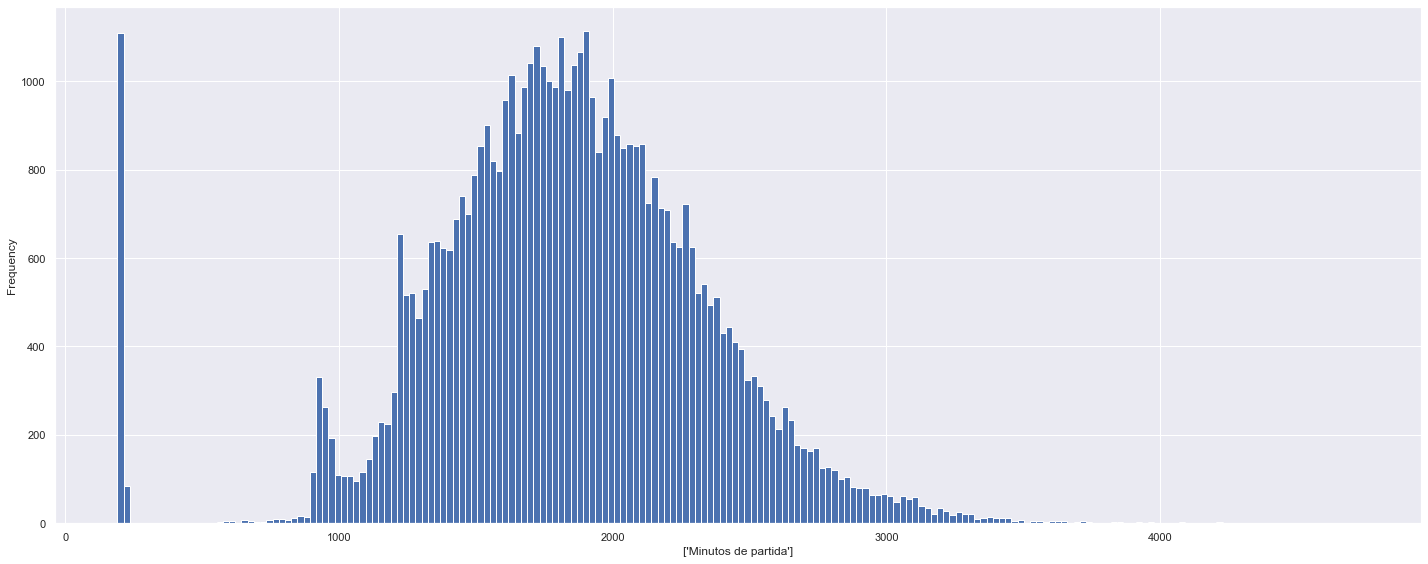

In [23]:
# Gráfica de duración de las partidas:
games['gameDuration'].plot(kind='hist',bins=200, figsize=(20,8))
label = ['Minutos de partida']  
plt.xlabel(label)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10] ,minutes,rotation=45)
plt.tight_layout()
plt.show();

La mayoría de partidas se han comprendido entre el minuto 15 y el minuto 30 aproximadamente. De acuerdo, varía mucho en el tiempo entre cada partida, esto se debe a que es un juego en el que participan distintos jugadores y tiene muchísimas variables. Pero, ¿Veis ese pico de partidas acabadas alrededor del minuto 3? No son outliers, son partidas las cuales, por desconexión de algún jugador, se han reecho de nuevo. Lo que se conoce como remake. 

Comparemos ahora la correlación de los primeros 10 minutos de partida con los factores en esta nueva, comprendiendo todo el game. Esta vez, observemos los dos equipos, a diferencia que la gráfica anterior, ya que contamos con datos independientes de los dos equipos enfrentados.  

<Figure size 2160x720 with 0 Axes>

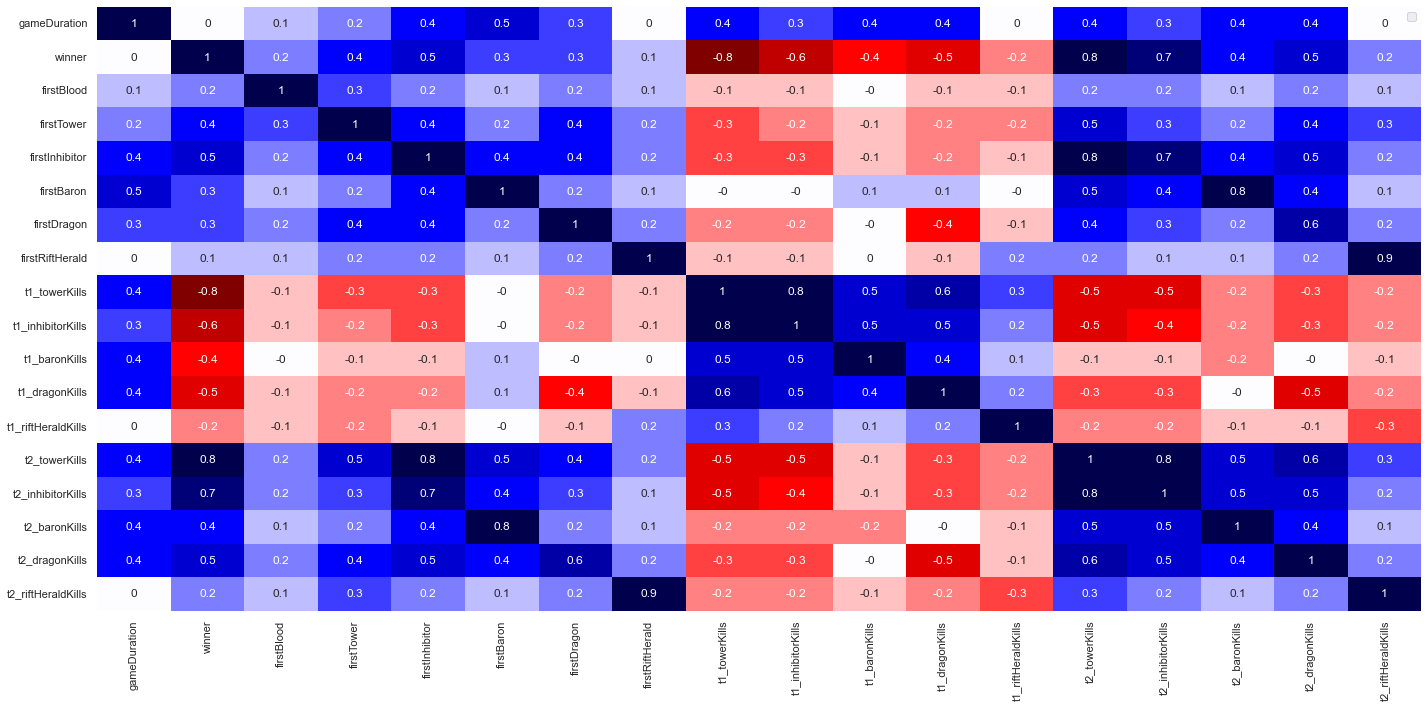

In [24]:
plt.figure(figsize=(30,10))
corrmat2 = games.corr()
# corrmat2 = np.tril(corrmat2)
corrmat2[corrmat2==0] = None
corrmat2 = corrmat2.round(1)
labels = games.select_dtypes(include='number').columns.values
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat2, annot=True, vmax=0.8,vmin=-0.8, cmap='seismic_r', xticklabels=labels,yticklabels=labels, cbar=False)
plt.legend('')
plt.tight_layout()
plt.show();

Tras haber limpiado variables que no nos servirían de nada en este gráfico (los campeones seleccionados y los baneados), vemos mucha claridad en los datos que hemos correlacionado. Los datos limpiados sirven para eliminar variables que no nos hubieran aportado nada, ya que nada tiene que ver, por ejemplo, el campeón que escogió para la partida el cuarto jugador del equipo 1 con el potencial de conseguir un objetivo neutral como puede ser un Baron Nashor o un dragón. En definitiva, cualquier campeón, jugando en equipo, se combina con su composición (el bloque formado por la combinación de los 5 jugadores del equipo) para ganar. 

En la gráfica mostrada observamos más factores aquí a tener en cuenta, pero a priori, las más correlacionadas son la mayoría de torres destruidas para así conseguir destruir el primer inhibidor, el cual lo guardan 3 torres, por cada línea. También apreciamos, muy interesantemente, que a mayor número de torretas destruidas, mayor número de dragones (objetivo neutral) se han conseguido, el cual explica que a mayor número de torres destruida, se domina mejor el mapa. 

In [28]:
games_corr = games.corr()
games_corr['winner'].sort_values(ascending=False)

winner                1.000000
t2_towerKills         0.785813
t2_inhibitorKills     0.660452
firstInhibitor        0.536437
t2_dragonKills        0.497206
t2_baronKills         0.399249
firstTower            0.375697
firstDragon           0.310386
firstBaron            0.261888
t2_riftHeraldKills    0.226102
firstBlood            0.174770
firstRiftHerald       0.119813
gameDuration          0.024187
t1_riftHeraldKills   -0.218066
t1_baronKills        -0.369472
t1_dragonKills       -0.472483
t1_inhibitorKills    -0.649405
t1_towerKills        -0.771541
Name: winner, dtype: float64

Hmmm... interesante. En el banco de datos de partidas globales también indica que los objetivos neutrales y torretas son las que tienen más impacto en relación con las victorias!

#### OBJETIVOS NEUTRALES

Con este sencillo comando a continuación, observemos cuántas torretas y cuántos inhibidores y monstruos neutrales suele haber por victoria:

In [29]:
games.describe()

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
count,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,1832.362808,1.493552,1.471295,1.450631,1.308487,0.926510,1.442804,0.731676,5.699359,1.017537,0.372286,1.387182,0.251466,5.549466,0.985084,0.414547,1.404370,0.240105
std,512.017696,0.499963,0.520326,0.542848,0.676097,0.841424,0.569579,0.822526,3.799808,1.263934,0.583934,1.206818,0.433860,3.860989,1.256284,0.613768,1.224492,0.427151
min,190.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1531.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1833.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000
75%,2148.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000
max,4728.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,11.000000,10.000000,5.000000,6.000000,1.000000,11.000000,10.000000,4.000000,6.000000,1.000000


In [32]:
games_stats = games.groupby('winner')['t1_towerKills','t1_inhibitorKills','t1_baronKills',
                        't1_dragonKills','t1_riftHeraldKills',
                        't2_towerKills','t2_inhibitorKills','t2_baronKills','t2_dragonKills','t2_riftHeraldKills'].mean()
games_stats

,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
winner,,,,,,,,,,
1,8.593473,1.827818,0.585267,1.950071,0.344863,2.554358,0.166008,0.172643,0.803352,0.144764
2,2.729627,0.186086,0.153740,0.809586,0.155629,8.622831,1.825562,0.662771,2.021092,0.337937


En esta tabla, a simple vista nos muestra claramente que en la duración completa de la partida:
- El equipo ganador destruye una media de más de 8 torretas por juego. Ya que la media de torres del T1 es 8.59 y la del T2 es 8.62.
- El equipo ganador suele tirar cerca de 2 inhibidores. De los 3 que hay en el juego. Los inhibidores hacen que se generen superminions, los cuales tienen mucho más daño, equivaliendo a mucho más poder destructor.
- El equipo ganador tiene una media de 0.63 Baron Nashors en su haber. Esto quiere decir que, hay partidas que no se necesita ninguno para ganar, pero hay más partidas con Nashors ganadas que partidas ganadas sin este monstruo neutral. 
- El equipo ganador consigue el Heraldo de la Grieta ganando más veces de las que gana sin conseguirlo.
- El equipo ganador ronda los 2 dragones por partida, aunque la importancia de los dragones depende de la temporada que juzguemos, ya que cada 'season' tiene características diferentes. Esto son datos de la temporada 9.

De acuerdo. Nos ha quedado bastante claro que tanto el oro como la experiencia conseguida en la partida son las claves más cercanas para asegurar en la medida de la posible las victorias conseguidas. Esto, sumado a las tablas recientes que apuntan a un mayor número de torretas, dragones e inhibores por victoria en los equipos, nos conduce a pensar que está relacionado. Obviamente, a más estructuras y objetivos conseguidos/derribados, más oro, más experiencia, más presión en el mapa y mayor probabilidad de victoria.

Vamos a ver ahora la relación entre torres destruidas y su presión en el mapa, lo que se puede conseguir con esos derribos.

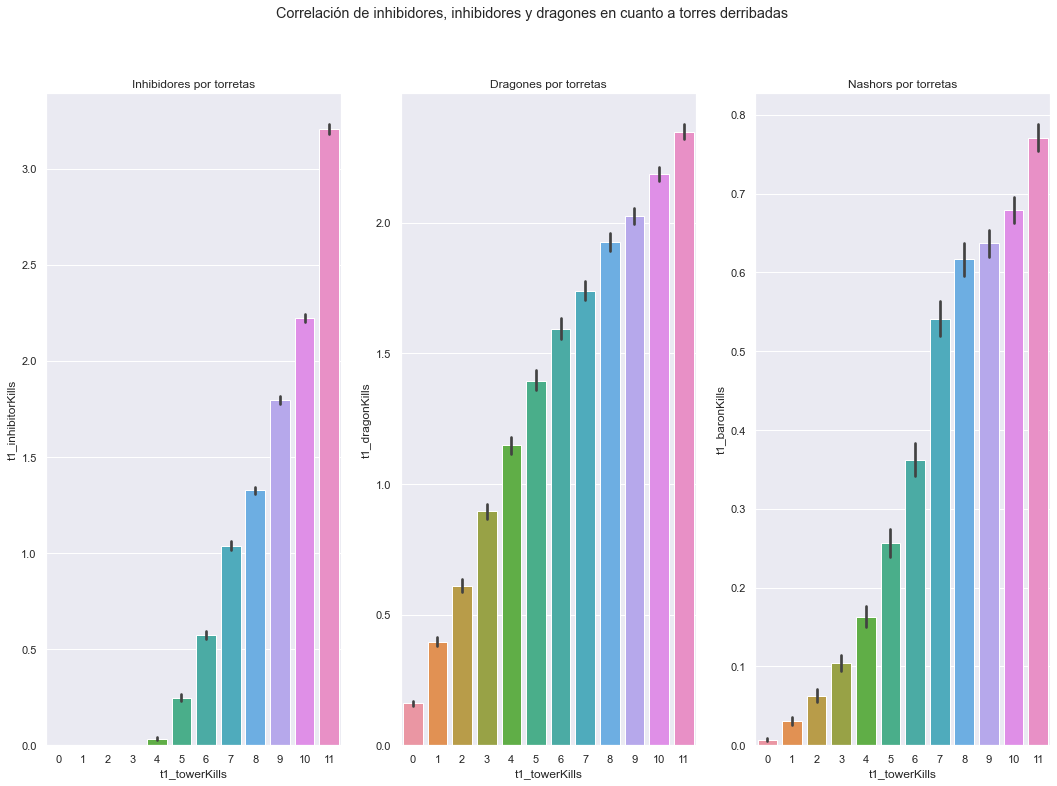

In [26]:
fig, axes = plt.subplots(1,3, figsize=(18,12), sharex=True)
fig.suptitle('Correlación de inhibidores, inhibidores y dragones en cuanto a torres derribadas')
sns.barplot(ax=axes[0], x=games['t1_towerKills'], y=games['t1_inhibitorKills'])
axes[0].set_title('Inhibidores por torretas')
sns.barplot(ax=axes[1], x=games['t1_towerKills'], y=games['t1_dragonKills'])
axes[1].set_title('Dragones por torretas')
sns.barplot(ax=axes[2], x=games['t1_towerKills'], y=games['t1_baronKills'])
axes[2].set_title('Nashors por torretas');

Claramente, esta gráfica nos indica que a más torres destruidas, más presión en el mapa.
A más torres destruidas significa que hay más espacio para moverte por el mapa sin que haya zonas que estén defendidas por los rayos mortíferos de las torres, las cuales se han derribado gracias a ejércitos de minions que reciben el daño de la torre mientras los campeones las destruyen. 

El derribar torretas, significa que haces recular al equipo enemigo, ya que no tiene una zona para defenderse.
Conesguir torretas, demuestra la gráfica, aumenta la probabilidad muy claramente de conseguir objetivos neutrales en el mapa, lo cual, como vimos antes, está ligado a conseguir oro, experiencia y estadísticas para conseguir la victoria. 

## 4- Conclusiones

Una vez habiendo analizado 2 diferentes y extensas bases de datos conteniento gran cantidad y variedad de datos respectivos a **League of Legends**, hemos arrojado bastante luz a las preguntas que lanzábamos al principio del EDA.

Comenzamos limpiando datos que no nos interesan y quedándonos con los que sí.

Hemos visto que el tiempo medio por partida, el cual engloba todos los acontecimientos que se desarrollan. Hemos visto puntos por visión los cuales nos clarificaron que no por más cantidad, da más utilidad, sino que se debe utilizar inteligentemente. Entre otras variables, hemos visto el oro a los 10 minutos de partida, el cual hemos visto con correlaciones y rankings que son las variables más marcadas con la victoria. 

Esa correlación nos llevó a los descubrimientos más importantes. Necesitamos **oro** y **experiencia** para ganar. Genial.

Explorando más en nuestros datos, llegamos a la conclusión de que la clave para conseguir oro y exp, es destruir **torres**, conseguir **dragones** y **Nashors**, la cual nos va a llevar, con más probabilidad, a la VICTORIA. 

## 5- URLs consultadas

Las URLs visitadas para la elaboración de este EDA han sido:
* https://www.kaggle.com/
* https://realpython.com/
* https://matplotlib.org/stable/index.html
* https://github.com/
* https://www.nytimes.com/2014/10/12/technology/riot-games-league-of-legends-main-attraction-esports.html
* https://www.leagueoflegends.com/es-es/how-to-play/
* https://www.geeksforgeeks.org/
* https://es.stackoverflow.com/
* https://seaborn.pydata.org/



### Muchas gracias por vuestro tiempo.

Mario Chacón Ruiz